In [ ]:
import pandas as pd
import numpy as np
## 导入真实数据
real_features = np.load("./data/features144.npy")
real_attributes =  np.load("./data/attributes.npy").T
gen_features = np.load("./result/gen_sample_features.npy")
gen_attributes = np.load("./result/gen_sample_attributes.npy")
cols_name =["q","p","t"]

In [2]:
def get_feature(Label: tuple[int,int,int],type:str = "real",number:int=10):
    if type == "real":
        features= real_features
        Labels = real_attributes
    elif type == "fake":
        features = gen_features
        Labels = gen_attributes
    cols_name =["q","p","t"]
    attributes_df = pd.DataFrame(Labels,columns=cols_name)
    groups = attributes_df.reset_index().groupby(["q","p","t"])
    print(groups.groups.keys())
    return features[np.random.choice(groups.groups[Label],number)]


In [3]:
label = (0,1,0)
real = get_feature(label,type="real",number=1000)
gen = get_feature(label,type="fake",number=10)

dict_keys([(0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 1, 0)])
dict_keys([(0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 1, 0)])


<AxesSubplot: >

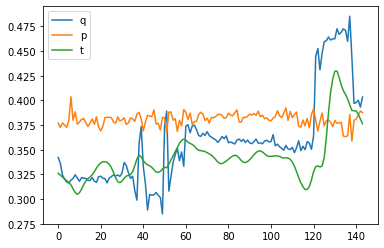

In [9]:
pd.DataFrame(real[2],columns=cols_name).plot()